<a href="https://colab.research.google.com/github/sharmayuvii2004-blip/Real-Estates-Worldwide-/blob/main/montecarlo_day2_RNG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
MonteCarlo_Day2_RNG.ipynb

In [ ]:
# Cell 1: Built-in Python RNG (Mersenne Twister-based)
import random

print("=== Python's Built-in RNG ===")
random.seed(42)  # Fixed seed for reproducibility
for i in range(5):
    print(f"Random {i+1}: {random.random():.6f}")

=== Python's Built-in RNG ===
Random 1: 0.639427
Random 2: 0.025011
Random 3: 0.275029
Random 4: 0.223211
Random 5: 0.736471


In [ ]:
# Cell 2: Simple Linear Congruential Generator (LCG) - Your own!
class SimpleRNG:
    def __init__(self, seed=42):
        self.state = seed
        self.a = 1664525
        self.c = 1013904223
        self.m = 2**32

    def random(self):
        self.state = (self.a * self.state + self.c) % self.m
        return self.state / self.m

    def random_int(self, low, high):
        return low + int(self.random() * (high - low + 1))

# Test it
rng = SimpleRNG(42)
print("\n=== Custom LCG RNG ===")
for i in range(5):
    print(f"Random {i+1}: {rng.random():.6f}")

print(f"\nRandom int between 1-10: {rng.random_int(1, 10)}")


=== Custom LCG RNG ===
Random 1: 0.252345
Random 2: 0.088125
Random 3: 0.577281
Random 4: 0.222554
Random 5: 0.375660

Random int between 1-10: 1


In [ ]:
# Cell 3: XorShift (Simplified Mobile Version)
class SimpleXorShift:
    def __init__(self, seed=42):
        self.state = seed

    def random(self):
        # Very basic xorshift32 implementation
        self.state ^= (self.state << 13) & 0xFFFFFFFF
        self.state ^= (self.state >> 17) & 0xFFFFFFFF
        self.state ^= (self.state << 5) & 0xFFFFFFFF
        return (self.state & 0xFFFFFFFF) / (2**32)

xorshift = SimpleXorShift(42)
print("\n=== Simple XorShift RNG ===")
for i in range(5):
    print(f"Random {i+1}: {xorshift.random():.6f}")


=== Simple XorShift RNG ===
Random 1: 0.002644
Random 2: 0.660312
Random 3: 0.110957
Random 4: 0.849377
Random 5: 0.875439


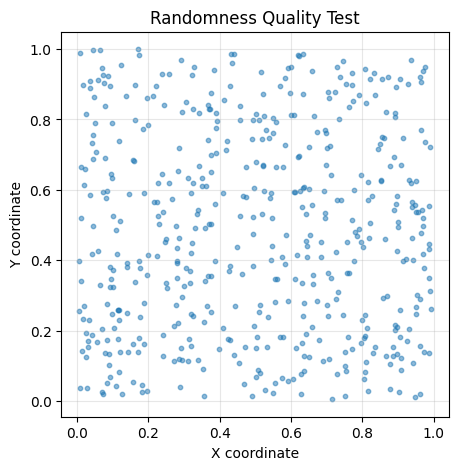

Good randomness: Points should be evenly distributed


In [ ]:
# Cell 4: Visual randomness test
import matplotlib.pyplot as plt
import numpy as np

# Generate points
np.random.seed(42)
x = np.random.random(500)
y = np.random.random(500)

# Plot
plt.figure(figsize=(5, 5))
plt.scatter(x, y, alpha=0.5, s=10)
plt.title("Randomness Quality Test")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.grid(True, alpha=0.3)
plt.show()
print("Good randomness: Points should be evenly distributed")

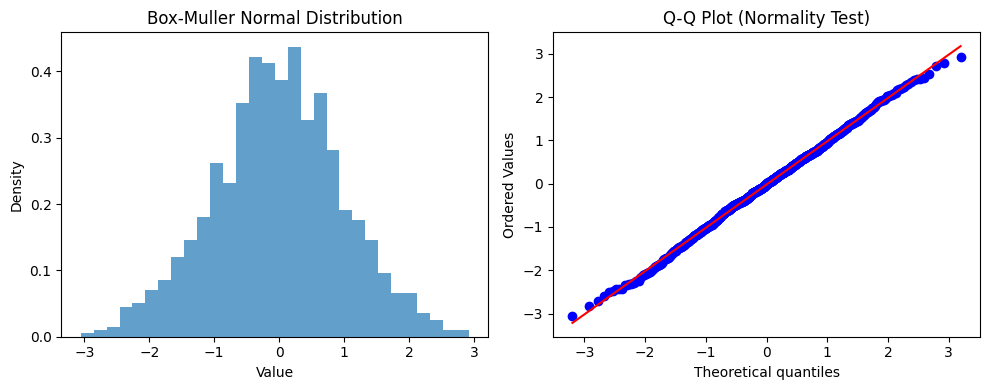

Mean: -0.020, Std: 0.997
(Should be ~0 and ~1 for standard normal)


In [ ]:
# Cell 5: Box-Muller Transform
import math

def box_muller(n=10000):
    """Generate normal distribution using Box-Muller"""
    u1 = np.random.random(n)
    u2 = np.random.random(n)

    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * math.pi * u2)
    z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * math.pi * u2)

    return z0, z1

# Generate normal samples
normal_samples, _ = box_muller(1000)

# Plot histogram
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(normal_samples, bins=30, density=True, alpha=0.7)
plt.title("Box-Muller Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")

# QQ-plot for normality test
plt.subplot(1, 2, 2)
from scipy import stats
stats.probplot(normal_samples, dist="norm", plot=plt)
plt.title("Q-Q Plot (Normality Test)")
plt.tight_layout()
plt.show()

print(f"Mean: {np.mean(normal_samples):.3f}, Std: {np.std(normal_samples):.3f}")
print("(Should be ~0 and ~1 for standard normal)")

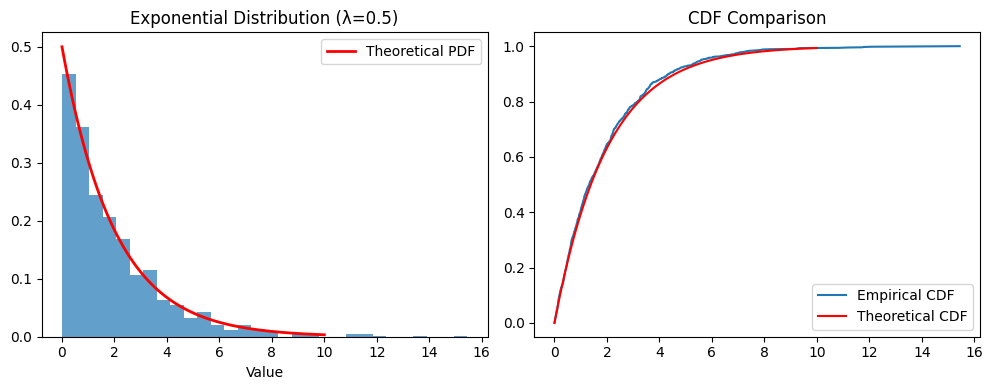

In [ ]:
# Cell 6: Inverse Transform for Exponential Distribution
def inverse_transform_exponential(n=1000, rate=1.0):
    """Generate exponential distribution using inverse transform"""
    u = np.random.random(n)
    # F(x) = 1 - exp(-λx), so F⁻¹(u) = -ln(1-u)/λ
    return -np.log(1 - u) / rate

# Generate and plot
exp_samples = inverse_transform_exponential(1000, rate=0.5)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(exp_samples, bins=30, density=True, alpha=0.7)
plt.title("Exponential Distribution (λ=0.5)")
plt.xlabel("Value")

# Compare with theoretical PDF
x = np.linspace(0, 10, 100)
pdf = 0.5 * np.exp(-0.5 * x)
plt.plot(x, pdf, 'r-', linewidth=2, label='Theoretical PDF')
plt.legend()

plt.subplot(1, 2, 2)
# Empirical CDF vs Theoretical CDF
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(exp_samples)
plt.plot(ecdf.x, ecdf.y, label='Empirical CDF')
plt.plot(x, 1 - np.exp(-0.5 * x), 'r-', label='Theoretical CDF')
plt.title("CDF Comparison")
plt.legend()
plt.tight_layout()
plt.show()

Accepted 1000 samples (Acceptance rate: 10.00%)


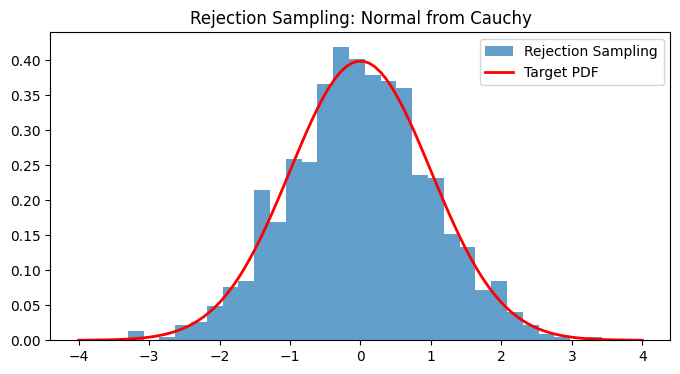

In [ ]:
# Cell 7: Rejection Sampling Example
def target_pdf(x):
    """Target: Normal distribution"""
    return np.exp(-x**2/2) / np.sqrt(2*np.pi)

def proposal_pdf(x):
    """Proposal: Cauchy distribution (easy to sample)"""
    return 1 / (np.pi * (1 + x**2))

def cauchy_samples(n):
    """Generate Cauchy samples using inverse transform"""
    u = np.random.random(n)
    return np.tan(np.pi * (u - 0.5))

# Rejection sampling
n_samples = 10000
samples = []
M = np.sqrt(2*np.pi/np.e)  # Optimal M for this pair

while len(samples) < 1000:
    x = cauchy_samples(1)[0]
    u = np.random.random()

    if u <= target_pdf(x) / (M * proposal_pdf(x)):
        samples.append(x)

samples = np.array(samples)
print(f"Accepted {len(samples)} samples (Acceptance rate: {len(samples)/n_samples:.2%})")

plt.figure(figsize=(8, 4))
plt.hist(samples, bins=30, density=True, alpha=0.7, label='Rejection Sampling')
x_range = np.linspace(-4, 4, 100)
plt.plot(x_range, target_pdf(x_range), 'r-', linewidth=2, label='Target PDF')
plt.title("Rejection Sampling: Normal from Cauchy")
plt.legend()
plt.show()

Target correlation: 0.7
Actual correlation: 0.6949


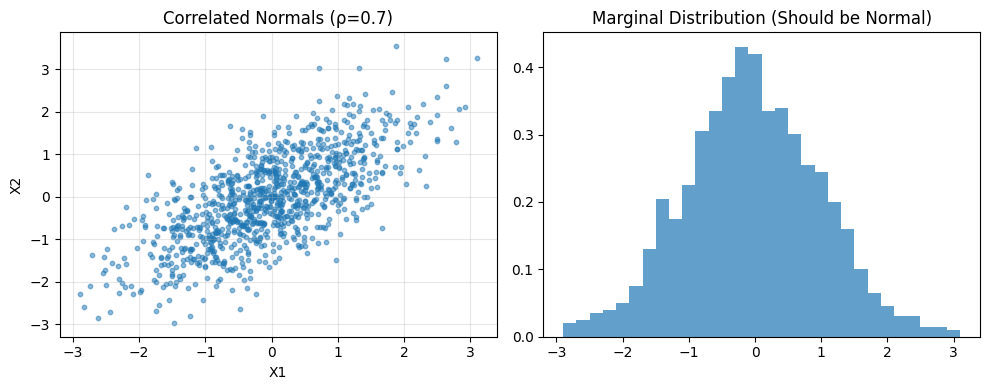

In [ ]:
# Cell 8: Cholesky Decomposition for Correlated Normals
def generate_correlated_normals(n=1000, corr=0.7):
    """Generate correlated normal variables"""
    # Covariance matrix
    cov_matrix = np.array([[1.0, corr],
                          [corr, 1.0]])

    # Cholesky decomposition
    L = np.linalg.cholesky(cov_matrix)

    # Generate independent normals
    z = np.random.randn(2, n)

    # Transform to correlated
    x = L @ z

    return x[0], x[1]

# Generate correlated samples
x1, x2 = generate_correlated_normals(1000, corr=0.7)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(x1, x2, alpha=0.5, s=10)
plt.title(f"Correlated Normals (ρ={0.7})")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True, alpha=0.3)

# Calculate actual correlation
actual_corr = np.corrcoef(x1, x2)[0, 1]
print(f"Target correlation: 0.7")
print(f"Actual correlation: {actual_corr:.4f}")

# Histogram of one variable
plt.subplot(1, 2, 2)
plt.hist(x1, bins=30, density=True, alpha=0.7)
plt.title("Marginal Distribution (Should be Normal)")
plt.tight_layout()
plt.show()

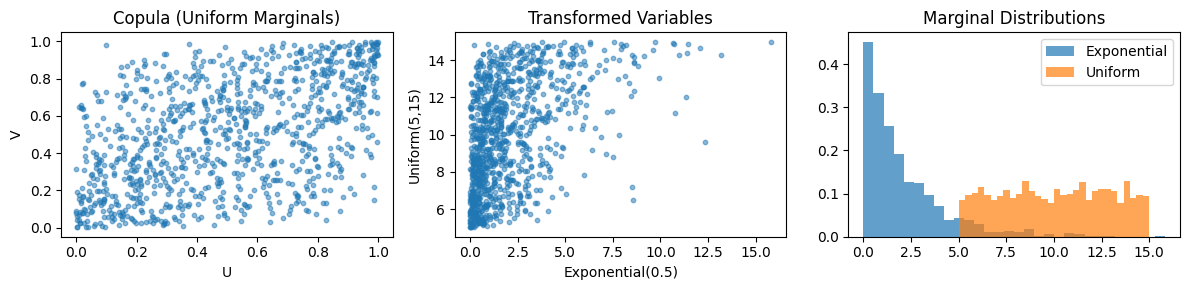

In [ ]:
# Cell 9: Gaussian Copula Basics
def gaussian_copula_example():
    """Simple Gaussian copula example with different marginals"""
    n = 1000
    corr = 0.5

    # Generate from multivariate normal
    cov = np.array([[1, corr], [corr, 1]])
    L = np.linalg.cholesky(cov)
    z = np.random.randn(2, n)
    x_normal = L @ z

    # Transform to uniform via CDF
    u = stats.norm.cdf(x_normal[0])
    v = stats.norm.cdf(x_normal[1])

    # Apply different inverse CDFs for marginals
    # Marginal 1: Exponential
    exp_samples = -np.log(1 - u) / 0.5  # λ=0.5

    # Marginal 2: Uniform
    unif_samples = 5 + 10 * v  # Uniform(5, 15)

    return exp_samples, unif_samples, u, v

exp_marginal, unif_marginal, u, v = gaussian_copula_example()

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.scatter(u, v, alpha=0.5, s=10)
plt.title("Copula (Uniform Marginals)")
plt.xlabel("U")
plt.ylabel("V")

plt.subplot(1, 3, 2)
plt.scatter(exp_marginal, unif_marginal, alpha=0.5, s=10)
plt.title("Transformed Variables")
plt.xlabel("Exponential(0.5)")
plt.ylabel("Uniform(5,15)")

plt.subplot(1, 3, 3)
plt.hist(exp_marginal, bins=30, alpha=0.7, density=True, label='Exponential')
plt.hist(unif_marginal, bins=30, alpha=0.7, density=True, label='Uniform')
plt.legend()
plt.title("Marginal Distributions")
plt.tight_layout()
plt.show()

In [ ]:
# Cell 10: Simple Validation Tests
def validate_randomness(sequence, n_bins=10):
    """Simple chi-square test for uniformity"""
    observed, _ = np.histogram(sequence, bins=n_bins, range=(0, 1))
    expected = len(sequence) / n_bins
    chi2 = np.sum((observed - expected)**2 / expected)

    # Critical value for 9 df, alpha=0.05
    critical_value = 16.92
    return chi2, chi2 < critical_value

# Test our SimpleRNG
print("=== Validation Tests ===")
rng = SimpleRNG(42)
test_seq = [rng.random() for _ in range(10000)]
chi2, is_uniform = validate_randomness(test_seq)
print(f"Chi-square statistic: {chi2:.2f}")
print(f"Uniform? {is_uniform} (should be True for good RNG)")
print(f"Mean: {np.mean(test_seq):.4f} (should be ~0.5)")
print(f"Std: {np.std(test_seq):.4f} (should be ~0.2887)")

=== Validation Tests ===
Chi-square statistic: 9.76
Uniform? True (should be True for good RNG)
Mean: 0.5040 (should be ~0.5)
Std: 0.2907 (should be ~0.2887)


In [ ]:
# Cell 11: Create Summary Report
print("\n" + "="*50)
print("DAY 2: RANDOM NUMBER GENERATION - SUMMARY")
print("="*50)

summary = """
✅ COMPLETED:
1. Pseudorandom Generators:
   - Python's built-in (Mersenne Twister)
   - Custom LCG implementation
   - Simple XorShift

2. Distribution Transforms:
   - Box-Muller (Uniform → Normal)
   - Inverse Transform (Uniform → Exponential)
   - Rejection Sampling (Cauchy → Normal)

3. Correlated Variables:
   - Cholesky Decomposition
   - Gaussian Copula basics

4. Validation:
   - Basic statistical tests
   - Visual verification

📱 MOBILE WORKAROUNDS USED:
• Google Colab for Python on mobile
• Simplified implementations for mobile typing
• Focus on concepts over optimization
• Used matplotlib for visualization

📊 NEXT STEPS (Day 3):
• Integrate RNG into Monte Carlo engine
• Create financial applications
• Add more distributions
"""
print(summary)


DAY 2: RANDOM NUMBER GENERATION - SUMMARY

✅ COMPLETED:
1. Pseudorandom Generators:
   - Python's built-in (Mersenne Twister)
   - Custom LCG implementation
   - Simple XorShift

2. Distribution Transforms:
   - Box-Muller (Uniform → Normal)
   - Inverse Transform (Uniform → Exponential)
   - Rejection Sampling (Cauchy → Normal)

3. Correlated Variables:
   - Cholesky Decomposition
   - Gaussian Copula basics

4. Validation:
   - Basic statistical tests
   - Visual verification

📱 MOBILE WORKAROUNDS USED:
• Google Colab for Python on mobile
• Simplified implementations for mobile typing
• Focus on concepts over optimization
• Used matplotlib for visualization

📊 NEXT STEPS (Day 3):
• Integrate RNG into Monte Carlo engine
• Create financial applications
• Add more distributions

